# Project 2 - Ames Housing Data and Kaggle Challenge

### Run 'Test' Dataset through this file - refer readme for more information on how to use this file

## Executive Summary

### Contents:
- [READ ME](#Import-Libraries)
- [DATA DICTIONARY](#EDA-Step1:-Check-for-datatypes-and-missing-values)
- [GO TO MAIN TRAINING FILE](SamayShah_Project2(Main_TRAIN)_DataCleaning_Train_Dataset.ipynb)
- [FINAL MODEL Dataset Export - Model#4](SamayShah_MODEL%234__FINAL_MODEL__.ipynb)

## Perform EDA and Export dataset

In [1]:
## Linear Regression Models under separate files

In [2]:
## Import libraries for EDA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
## Read our train.csv file

df = pd.read_csv('./datasets/Test/test.csv')
df.head(1)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD


## EDA Step1: Check for datatypes and missing values

In [4]:
## Will also try and map/group some simple features in this section

In [5]:
##1 Lot Frontage Feature
##Replace missing values for 'Lot Frontage' with .median() values

for i in ['Lot Frontage']:
    df.loc[df.loc[:,i].isnull(),i]=df.loc[:,i].median()

In [6]:
##Change the datatype to integer for easy calculations

df['Lot Frontage'] = df['Lot Frontage'].astype(int)

In [7]:
##2 Street Feature

df['Street'].value_counts()

Pave    873
Grvl      5
Name: Street, dtype: int64

In [8]:
##Dummify this feature manually

df['Street_isPaved'] = df['Street'].map({'Pave':1,'Grvl':0})

In [9]:
##3 Lot Shape Feature

df['Lot Shape'].value_counts()

Reg    564
IR1    286
IR2     21
IR3      7
Name: Lot Shape, dtype: int64

In [10]:
##Dummify this feature manually

df['Lotshape_isRegular'] = df['Lot Shape'].map({'Reg':1,'IR1':0,'IR2':0,'IR3':0})

In [11]:
##4 Land Contour Feature
##Dummify this feature manually

df['isLandLevel'] = df['Land Contour'].map({'Lvl':1,'HLS':0,'Bnk':0,'Low':0})

In [12]:
##5 Lot Config Feature
##Dummify this feature manually - 3 groups

df['isLotInside'] = df['Lot Config'].map({'Inside':1,'CulDSac':0,'Corner':0,'FR2':0,'FR3':0})
df['isLotCorner'] = df['Lot Config'].map({'Inside':0,'CulDSac':0,'Corner':1,'FR2':0,'FR3':0})
df['isLotCulDSac'] = df['Lot Config'].map({'Inside':0,'CulDSac':1,'Corner':0,'FR2':0,'FR3':0})

In [13]:
##6 Land Slope Feature
##Dummify this feature manually

df['isSlopeNormal'] = df['Land Slope'].map({'Gtl':1,'Mod':0,'Sev':0})

In [14]:
## Test if dummified correctly

df['isSlopeNormal'].value_counts()

1    835
0     43
Name: isSlopeNormal, dtype: int64

In [15]:
##7 Condition 1 - Feature
## Grouped/Renamed - to dummify later

df['proximity_to'] = df['Condition 1'].map({'Artery':'veryClose','Feedr':'veryClose','RRAn':'veryClose','RRAe':'veryClose',
                                            'Norm':'close',
                                            'RRNn':'far','PosA':'far','PosN':'far','RRNe':'far'})

In [16]:
##8 Neighbourhood Feature
## Grouped/Renamed - to dummify later

df['Density'] = df['Neighborhood'].map({'NAmes':'High','CollgCr':'High','OldTown':'High',
                                        'Edwards':'MedHigh','Somerst':'MedHigh','NridgHt':'MedHigh','Gilbert':'MedHigh','Sawyer':'MedHigh',
                                        'NWAmes':'MedLow','SawyerW':'MedLow','Mitchel':'MedLow','BrkSide':'MedLow','Crawfor':'MedLow','IDOTRR':'MedLow',
                                        'NoRidge':'Low','Timber':'Low','StoneBr':'Low','SWISU':'Low','ClearCr':'Low','MeadowV':'Low','Blmngtn':'Low','BrDale':'Low','BrDale':'Low',
                                        'Veenker':'veryLow','NPkVill':'veryLow','NPkVill':'veryLow','Blueste':'veryLow','Greens':'veryLow','GrnHill':'veryLow','Landmrk':'veryLow'
                                       })

In [17]:
##9 House Style Feature

df['House Style'].value_counts()

1Story    422
2Story    274
1.5Fin     96
SLvl       34
SFoyer     33
2.5Unf     10
1.5Unf      7
2.5Fin      2
Name: House Style, dtype: int64

In [18]:
## Grouped/Renamed - to dummify later

df['House_style'] = df['House Style'].map({'1Story':'1_story',
                                          '1.5Fin':'1.5_story',
                                          '1.5Unf':'1.5_story',
                                          '2Story':'2&2.5_story',
                                          '2.5Unf':'2&2.5_story',
                                          '2.5Fin':'2&2.5_story',
                                          'SLvl':'Splitlevel',
                                          'SFoyer':'Splitlevel'
                                          })

In [19]:
##10 Bldg Type Feature
## Grouped/Renamed - to dummify later

df['Bldg_type'] = df['Bldg Type'].map({'1Fam':'Single','2fmCon':'Single',
                                       'Duplex':'Duplex',
                                       'TwnhsE':'TownHouse','Twnhs':'TownHouse'
                                      })

In [20]:
##11 Overall Cond, Overall Qual Features
### Create new feature 'overall rating' - temporarily, will add the scores and drop all 3 features later on
### Create an umbrella feature 'isgood_overall' and dummify

df['overall_rating'] = df['Overall Cond'] + df['Overall Qual']

In [21]:
##Dummify this feature manually

df['isgood_overall'] = df['overall_rating'].map(lambda x:int(x>12))

In [22]:
## Variation - manual function to categorize year built

def mapyearbuilt(value):
    if value >= 2000:
        x= 'Contemporary'
    elif value >=1980:
        x = 'Medieval'
    elif value >= 1950:
        x = 'Colonial'
    else:
        x = 'Stone-age'
    return x

In [23]:
sum(df['Year Built']>= 2000)

220

In [24]:
##12 Year Built Feature
## Grouped/Renamed - to dummify later

df['house_age'] = df['Year Built'].map(mapyearbuilt)

In [25]:
## Test to see if categories were created correctly

df['house_age'].value_counts()

Colonial        328
Contemporary    220
Stone-age       191
Medieval        139
Name: house_age, dtype: int64

In [26]:
##13 Year Remod/Add Feature
##Dummify this feature manually

df['is_remodeled'] = df['Year Remod/Add'].map(lambda x:int(x>=2000))

In [27]:
##14 Roof-style Feature - from my research looks like for 'Gable' style roofs, rates vary a lot
##Dummify this feature manually

df['is_roofGable'] = df['Roof Style'].map(lambda x:int(x=='Gable'))

In [28]:
df['Mas Vnr Type'].value_counts()

None       534
BrkFace    250
Stone       80
BrkCmn      12
CBlock       1
Name: Mas Vnr Type, dtype: int64

In [29]:
##15 Mas Vnr Type
##Dummify this feature manually

df['has_masonryveneer'] = df['Mas Vnr Type'].map(lambda x:int(x!='None'))

In [30]:
### If it has any kind of veneer applied - 1 else 0

df['has_masonryveneer'].value_counts()

0    534
1    344
Name: has_masonryveneer, dtype: int64

In [31]:
##16 Exter Cond + Exter Qual = hasgood_exterior dummy variable
## Grouped/Renamed - to dummify later

df['Exter Cond'] = df['Exter Cond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
df['Exter Qual'] = df['Exter Qual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})

In [32]:
df['hasgood_Exterior'] = (df['Exter Cond'] + df['Exter Qual']).map(lambda x:int(x>5))

In [33]:
##17 Foundation Feature
## to dummify later

df['Foundation'].value_counts()

PConc     383
CBlock    381
BrkTil     90
Slab       15
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [34]:
##18 Bsmt Qual + Bsmt Cond + Bsmt Exposure = hasgood_basement dummy variable
## Grouped/Renamed - to dummify later

df.loc[df['Bsmt Qual'].isnull(),'Bsmt Qual'] = 'NA'
df.loc[df['Bsmt Cond'].isnull(),'Bsmt Cond'] = 'NA'
df.loc[df['Bsmt Exposure'].isnull(),'Bsmt Exposure'] = 'NA'

In [35]:
df['Bsmt Qual'] = df['Bsmt Qual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0})
df['Bsmt Cond'] = df['Bsmt Cond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0})
df['Bsmt Exposure'] = df['Bsmt Exposure'].map({'Gd':4,'Av':3,'Mn':2,'No':1,'NA':0})

In [36]:
df['hasgood_Basement'] = (df['Bsmt Qual'] + df['Bsmt Cond'] + df['Bsmt Exposure']).map(lambda x:int(x>8))

In [37]:
##19 Total Bsmt SF feature
### ##Dummify this feature manually

df['hasBasement'] = df['Total Bsmt SF'].map(lambda x:int(x==0))

In [38]:
##20 BsmtFin Type 1, Bsmt Fin Type 2, replace all null values with NA
## Grouped/Renamed - to dummify later

df.loc[df['BsmtFin Type 1'].isnull(),'BsmtFin Type 1'] = 'NA'
df.loc[df['BsmtFin Type 2'].isnull(),'BsmtFin Type 2'] = 'NA'

In [39]:
df['BsmtFin SF 1'].isnull().sum()

0

In [40]:
##21 BsmtFin SF 1 Feature, replace 1 null value with 0

df.loc[df['BsmtFin SF 1'].isnull(),'BsmtFin SF 1'] = 0

In [41]:
##22 BsmtFin SF 1, BsmtFin SF 2, mapped and typecast to int for consistency
## Grouped/Renamed - to dummify later

df['BsmtFin Type 1'] = df['BsmtFin Type 1'].map({'GLQ':5,'ALQ':4,'BLQ':3,'Rec':4,'LwQ':2,'Unf':1,'NA':0})
df['BsmtFin Type 2'] = df['BsmtFin Type 2'].map({'GLQ':5,'ALQ':4,'BLQ':3,'Rec':4,'LwQ':2,'Unf':1,'NA':0})
df['BsmtFin Type 1'] = df['BsmtFin Type 1'].astype(int)
df['BsmtFin Type 2'] = df['BsmtFin Type 2'].astype(int)

In [42]:
##23 BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF Features = convert null values to 0
### (considering those houses do not have a basement - hence sqft.= 0)
### Create new feature 'is_fullyfurnished' and dummify

df.loc[df['BsmtFin SF 2'].isnull(),'BsmtFin SF 2'] = 0
df.loc[df['Bsmt Unf SF'].isnull(),'Bsmt Unf SF'] = 0
df.loc[df['Total Bsmt SF'].isnull(),'Total Bsmt SF'] = 0

In [43]:
df['BsmtFin SF 1'] = df['BsmtFin SF 1'].astype(int)
df['BsmtFin SF 2'] = df['BsmtFin SF 2'].astype(int)
df['Bsmt Unf SF'] = df['Bsmt Unf SF'].astype(int)
df['Total Bsmt SF'] = df['Total Bsmt SF'].astype(int)

In [44]:
df['is_fullfurnished'] = df['Total Bsmt SF'].map(lambda x: 1 if x==0 else 0)

In [45]:
df['is_fullfurnished'].value_counts()

0    853
1     25
Name: is_fullfurnished, dtype: int64

In [46]:
##24 Heating Feature
##Dummify this feature manually

df['has_gasFurnace'] = df['Heating'].map({'GasA':1,'GasW':0,'Wall':0,'Grav':0,'OthW':0})

In [47]:
##25 Heating QC Feature
## Grouped/Renamed - to dummify later

df['Heating QC'] = df['Heating QC'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})

In [48]:
##26 Central Air Feature
##Dummify this feature manually

df['has_centralAir'] = df['Central Air'].map({'Y':1,'N':0})

In [49]:
##27 Bsmt Full Bath, Bsmt Half Bath - replace null values with 0, considering same houses do not have a basement

df.loc[df['Bsmt Full Bath'].isnull(),'Bsmt Full Bath'] = 0
df.loc[df['Bsmt Half Bath'].isnull(),'Bsmt Half Bath'] = 0

In [50]:
##28 Full Bath, Half Bath - creating new features 'total full baths' and 'total half baths'

df['total_full_baths'] = df['Full Bath'] + df['Bsmt Full Bath']
df['total_half_baths'] = df['Half Bath'] + df['Bsmt Half Bath']

In [51]:
### typecast

df['total_full_baths'] = df['total_full_baths'].astype(int)
df['total_half_baths'] = df['total_half_baths'].astype(int)

In [52]:
##29 Kitchen AbvGr Feature = mapped/dummified to has_1plus kitchen

df['has_1pluskitchen'] = df['Kitchen AbvGr'].map({0:0,1:0,2:1,3:1})

In [53]:
df['Kitchen Qual'].unique()

array(['Fa', 'TA', 'Gd', 'Ex', 'Po'], dtype=object)

In [54]:
##30 Kitchen Qual = mapped/dummified to 'has_goodkitchen'

df['has_goodkitchen'] = df['Kitchen Qual'].map({'Ex':1,'Gd':1,'TA':0,'Fa':0})

In [55]:
df.loc[df['has_goodkitchen'].isnull().sum(),'has_goodkitchen']

0.0

In [56]:
df['has_goodkitchen'] = df['has_goodkitchen'].map(lambda x:int(x==0 or x==1))

In [57]:
##31 Functional Feature = mapped/dummified to 'is_fullyfunctional' feature

df['is_fullyfunctional'] = df['Functional'].map(lambda x:int(x=='Typ'))

In [58]:
##32 Fireplaces Feature = mapped/dummified to 'has_fireplace' -> 1, else -> 0

df['has_fireplace'] = df['Fireplaces'].map(lambda x:int(x>0))

In [59]:
df['Garage Type'].isnull().sum()

44

In [60]:
##33 Garage Type feature - replacing null values with 'NA' for easy grouping and dummify later

df.loc[df['Garage Type'].isnull(),'Garage Type'] = 'NA'

In [61]:
##34 Create 1 more feature, has_detached garage or not

df['has_detachedGarage'] = df['Garage Type'].map(lambda x:int(x=='Detchd' or x=='CarPort'))

In [62]:
#35 Create 1 more feature, if one 'has_Garage' or not
### So many features from same variables might lead to multi-collinearity later, but can compare and drop later on

df['has_Garage'] = df['Garage Type'].map(lambda x:int(x!='NA'))

In [63]:
df['Garage Cars'].isnull().sum()

0

In [64]:
##36 Garage Cars Features, lets say every house has room for atleast 1 car

df.loc[df['Garage Cars'].isnull(),'Garage Cars'] = 1.0

In [65]:
## typecast

df['Garage Cars'] = df['Garage Cars'].astype(int)

In [66]:
##37 Garage Qual + Garage Condition = 'has_goodGarage' or not

df.loc[df['Garage Qual'].isnull(),'Garage Qual'] = 'NA'
df.loc[df['Garage Cond'].isnull(),'Garage Cond'] = 'NA'

In [67]:
df['Garage Qual'] = df['Garage Qual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0})
df['Garage Cond'] = df['Garage Cond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0})

In [68]:
df['has_goodGarage'] = (df['Garage Qual'] + df['Garage Cond']).map(lambda x:int(x>5))

In [69]:
##38 Paved Driveway Feature
##Dummify this feature manually

df['has_paveddriveway'] = df['Paved Drive'].map(lambda x:int(x=='Y'))

In [70]:
##39 Pool Area Feature
##Dummify this feature manually

df['has_pool'] = df['Pool Area'].map(lambda x:int(x>0))

In [71]:
##40 Wood Deck SF Feature,
###minor details might not be important - in order to buy a house, it definitely matters if one has a deck/pool or not
##Dummify this feature manually

df['has_woodDeck'] = df['Wood Deck SF'].map(lambda x:int(x>0))

In [72]:
##41 Open Porch SF, same as last one
##Dummify this feature manually

df['has_Porch'] = (df['Open Porch SF']+df['Enclosed Porch']+df['3Ssn Porch']+df['Screen Porch']).map(lambda x:int(x>0))

In [73]:
##42 Misc Feature - some houses might not have any misc. features, right?
##Dummify this feature manually

df.loc[df['Misc Feature'].isnull(),'Misc Feature'] = 'NA'

In [74]:
df['has_miscFeatures'] = df['Misc Feature'].map(lambda x:int(x!='NA'))

In [75]:
##43 Fence Feature - dummify to 'has_goodFence' or not

df.loc[df['Fence'].isnull(),'Fence'] = 'NA'

In [76]:
df['has_goodFence'] = df['Fence'].map(lambda x:int(x=='GdPrv' or x=='GdWo'))

In [77]:
#44 Sale Type Feature
## Grouped/Renamed - to dummify later

df['Sale Type'] = df['Sale Type'].map({'WD ':'WarrantyDeed','CWD':'WarrantyDeed','VWD':'WarrantyDeed',
                      'Con':'Contract','ConLw':'Contract','ConLI':'Contract','ConLD':'Contract',
                      'COD':'COD','New':'New Home','Oth':'Other'})

In [78]:
df['Sale Type'].unique()

array(['WarrantyDeed', 'New Home', 'Contract', 'COD', 'Other'],
      dtype=object)

In [79]:
## lets drop 4 rows with 'Sale Type' = Other

df.drop(index=df.loc[df['Sale Type']=='Other',:].index,inplace=True)

In [80]:
##45 Neighbourhood, group 3 dense neighbourhood into one category
##Dummify this feature manually

df['isNeigh_collgcr_oldtown'] = df['Neighborhood'].map(lambda x:int((x == 'CollgCr') or (x == 'OldTown') or (x == 'Edwards'))) 

In [81]:
##46 Density Feature
##Dummify this feature manually

df['is_densityHigh'] = df['Density'].map({'High':1,'MedHigh':1,'MedLow':0,'Low':0,'veryLow':0})

**Lets save our work so far - as data_no missing values**

In [82]:
## clean data v1 - no missing values and correct datatypes
df.to_csv('./datasets/Test/Test_v1_no_missing_values.csv',index=False)

**Removing all unwanted/already dummified Columns to avoid confusion**

In [83]:
## use df2 to remove all unwanted columns
df2 = df.copy()

In [84]:
df2.drop(columns=['Alley','Street','Lot Shape','Land Contour','Utilities','Lot Config','Land Slope','Condition 1','Condition 2','Bldg Type','House Style','overall_rating','Year Built','Year Remod/Add','Roof Matl','Mas Vnr Type','Mas Vnr Area','BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Heating','Central Air','Electrical','1st Flr SF','2nd Flr SF','Low Qual Fin SF','Gr Liv Area','Bsmt Full Bath','Bsmt Half Bath','Full Bath','Half Bath','Kitchen AbvGr','Kitchen Qual','TotRms AbvGrd','Functional','Fireplace Qu','Garage Type','Garage Yr Blt','Garage Finish','Garage Area','Paved Drive','Pool Area','Pool QC','Wood Deck SF','Open Porch SF','Enclosed Porch','3Ssn Porch','Screen Porch','Misc Feature','Misc Val','Fence'], inplace=True)

**Lets resave our work again as v2 for no missing values**

In [85]:
df2.to_csv('./datasets/Test/Test_v2_no_missing_values.csv',index=False)

## EDA Step 2: Plot and Clean dataset

In [86]:
## Lets reimport our csv here,
df3 = pd.read_csv('./datasets/Test/Test_v2_no_missing_values.csv')

In [87]:
df3.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Neighborhood,Overall Qual,Overall Cond,Roof Style,...,has_Garage,has_goodGarage,has_paveddriveway,has_pool,has_woodDeck,has_Porch,has_miscFeatures,has_goodFence,isNeigh_collgcr_oldtown,is_densityHigh
0,2658,902301120,190,RM,69,9142,OldTown,6,8,Gable,...,1,0,1,0,0,1,0,0,1,1
1,2718,905108090,90,RL,68,9662,Sawyer,5,4,Gable,...,1,1,1,0,1,0,0,0,0,1
2,2414,528218130,60,RL,58,17104,Gilbert,7,5,Gable,...,1,1,1,0,1,1,0,0,0,1
3,1989,902207150,30,RM,60,8520,OldTown,5,6,Gable,...,1,0,0,0,0,1,0,0,1,1
4,625,535105100,20,RL,68,9500,NAmes,6,5,Gable,...,1,1,1,0,0,1,0,0,0,1


In [131]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 875 entries, 0 to 874
Data columns (total 69 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       875 non-null    int64  
 1   PID                      875 non-null    int64  
 2   MS SubClass              875 non-null    int64  
 3   MS Zoning                875 non-null    object 
 4   Lot Frontage             875 non-null    int64  
 5   Lot Area                 875 non-null    int64  
 6   Neighborhood             875 non-null    object 
 7   Overall Qual             875 non-null    int64  
 8   Overall Cond             875 non-null    int64  
 9   Roof Style               875 non-null    object 
 10  Exterior 1st             875 non-null    object 
 11  Exterior 2nd             875 non-null    object 
 12  Exter Qual               875 non-null    int64  
 13  Exter Cond               875 non-null    int64  
 14  Foundation               8

**Plot Univariate Distributions - For Numerical Columns**

/Users/samay20/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


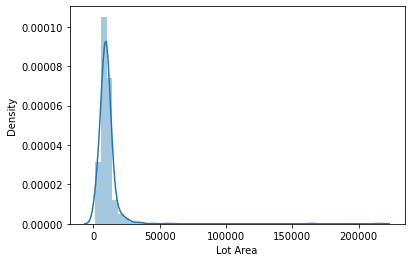

In [89]:
#1 Lot Area - Before
sns.distplot(df3['Lot Area']);

In [90]:
### Lets get rid of some outliers (higher side) from our dataset and save in a new dataframe

q = df3['Lot Area'].quantile(0.98) ##mask
df4 = df3[df3['Lot Area'] < q]

/Users/samay20/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


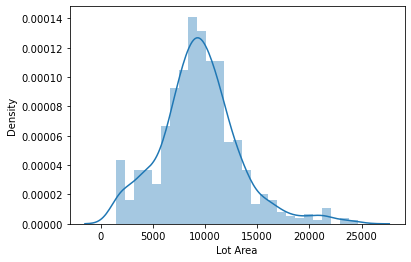

In [91]:
#1 Lot Area - After
### Looks almost normally distributed now

sns.distplot(df4['Lot Area']);

/Users/samay20/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


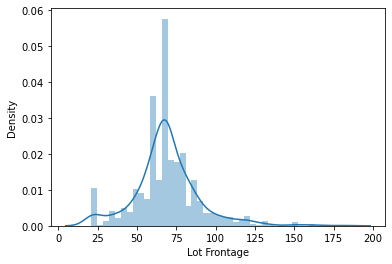

In [92]:
#3 LotFrontage - Before
sns.distplot(df4['Lot Frontage']);

In [93]:
### Lets get rid of some outliers (higher side) from our dataset and save in a new dataframe

s = df4['Lot Frontage'].quantile(0.99)
df6 = df4[df4['Lot Frontage']<s]

/Users/samay20/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


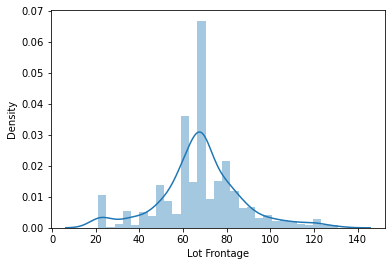

In [94]:
#3 LotFrontage - After
sns.distplot(df6['Lot Frontage']);

<AxesSubplot:>

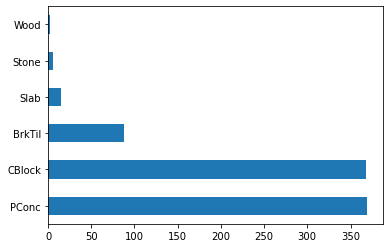

In [95]:
#Categorial
df6['Foundation'].value_counts().plot(kind='barh')

/Users/samay20/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


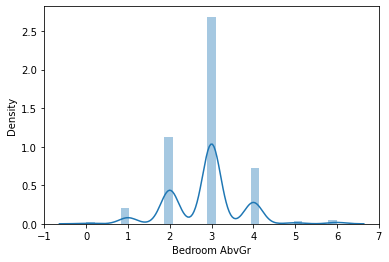

In [96]:
#4 Number of Bedrooms - Before
sns.distplot(df6['Bedroom AbvGr']);

In [97]:
## Delete the only row - with >6 bedrooms - clear outlier in our dataset

t = df6.loc[df6['Bedroom AbvGr']>6,:].index
df6.drop(index=t,inplace=True)

/Users/samay20/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


/Users/samay20/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


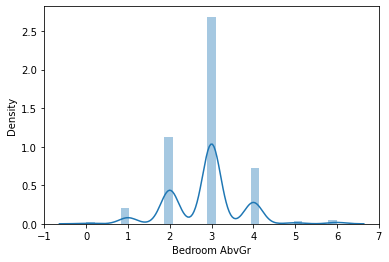

In [98]:
#4 Number of Bedrooms - After
sns.distplot(df6['Bedroom AbvGr']);

/Users/samay20/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


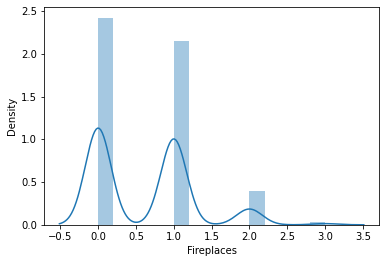

In [99]:
#5 Number of Fireplaces - Before
sns.distplot(df6['Fireplaces']);

In [100]:
#### Delete 6 row - with >2 Fireplaces - clear outliers in our dataset.

u = df6.loc[df6['Fireplaces']>2,:].index
df6.drop(index=u,inplace=True)

/Users/samay20/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


/Users/samay20/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


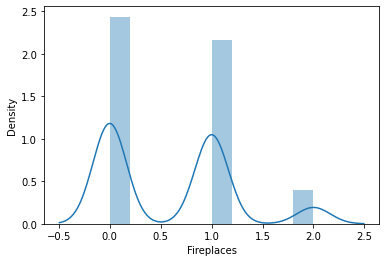

In [101]:
#6 Number of Fireplaces - Before (Makes sense as most houses don't come with a fireplace)
sns.distplot(df6['Fireplaces']);

/Users/samay20/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


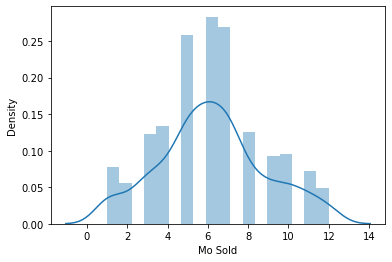

In [102]:
#7 Mo Sold (Categorical) - Makes sense that most houses are sold during summer
sns.distplot(df6['Mo Sold']);

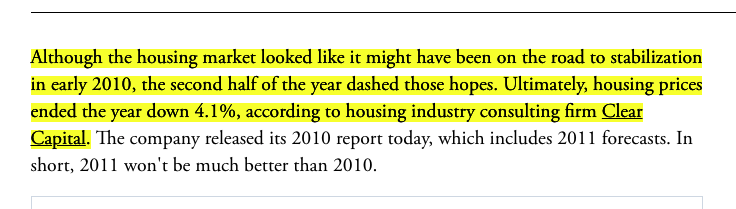

[Read Full Article][1]

[1]: https://www.theatlantic.com/business/archive/2011/01/after-an-ugly-2010-the-housing-market-wont-look-much-better-in-2011/69009/

/Users/samay20/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


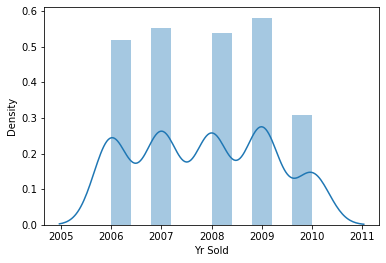

In [103]:
#8 Yr Sold - Looks like the market was steady year over year, except 2010 (Categorical)
sns.distplot(df6['Yr Sold']);

<AxesSubplot:xlabel='Sale Type', ylabel='Count'>

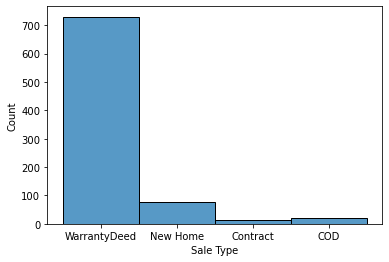

In [104]:
#9 Sale Type (Categorical) - Already grouped these categories in previous section
sns.histplot(df6['Sale Type'])

In [105]:
## Our index are all messed-up after dropping outliers, lets reset and drop old index

df7 = df6.reset_index(drop=True)

In [106]:
## Lets look at the description (including categorical) and see if everything falls within ~3SD from the mean

df7.describe(include='all')

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Neighborhood,Overall Qual,Overall Cond,Roof Style,...,has_Garage,has_goodGarage,has_paveddriveway,has_pool,has_woodDeck,has_Porch,has_miscFeatures,has_goodFence,isNeigh_collgcr_oldtown,is_densityHigh
count,843.000000,8.430000e+02,843.000000,843,843.000000,843.000000,843,843.000000,843.000000,843,...,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000
unique,NaN,NaN,NaN,5,NaN,NaN,26,NaN,NaN,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,RL,NaN,NaN,NAmes,NaN,NaN,Gable,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,640,NaN,NaN,129,NaN,NaN,682,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1431.179122,7.152416e+08,58.772242,NaN,67.890866,9387.289442,NaN,6.039146,5.578885,NaN,...,0.950178,0.882562,0.900356,0.002372,0.482800,0.697509,0.045077,0.075919,0.251483,0.615658
std,846.525798,1.885758e+08,42.428566,NaN,18.834886,3744.798538,NaN,1.355778,1.110041,NaN,...,0.217706,0.322132,0.299703,0.048679,0.500001,0.459609,0.207596,0.265026,0.434123,0.486728
min,2.000000,5.263021e+08,20.000000,NaN,21.000000,1477.000000,NaN,2.000000,1.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,684.500000,5.313750e+08,20.000000,NaN,60.000000,7200.000000,NaN,5.000000,5.000000,NaN,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1412.000000,5.354532e+08,50.000000,NaN,68.000000,9316.000000,NaN,6.000000,5.000000,NaN,...,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,2164.500000,9.071331e+08,72.500000,NaN,78.000000,11313.500000,NaN,7.000000,6.000000,NaN,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000


**Lets resave our work as v3 clean_no_outliers**

In [107]:
df7.to_csv('./datasets/Test/Test_v3_clean_nooutliers.csv',index=False)

## EDA Step 3: Multivariate Analysis

In [108]:
pairplot1 = df7[['Lot Frontage', 'Lot Area',
       'Neighborhood', 'Total Bsmt SF','Bedroom AbvGr']]

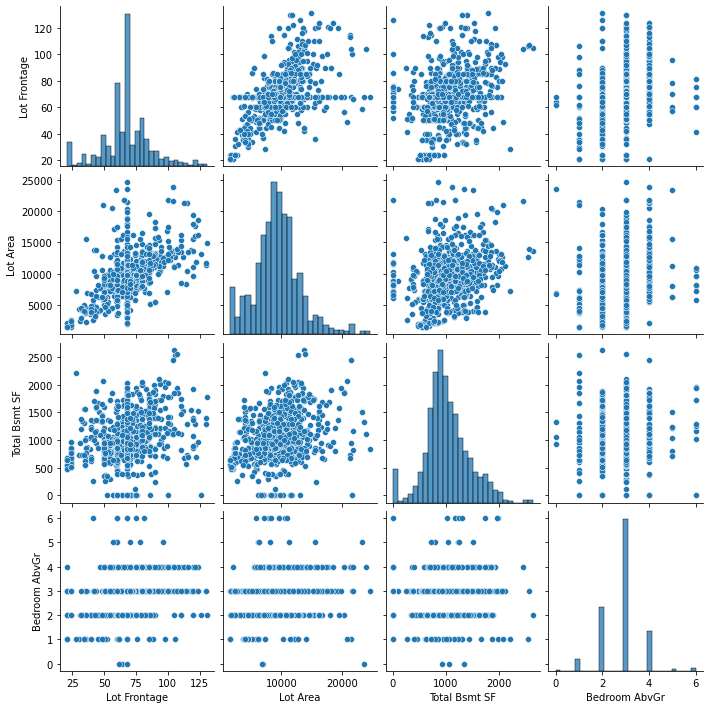

In [109]:
## Lets try to plor some numerical columns against our target 'SalePrice'
sns.pairplot(pairplot1)

**Model#1 - with Primary Predictors only**

In [110]:
variables1 = df7[['Lot Frontage', 'Lot Area','Total Bsmt SF','Bedroom AbvGr']]

In [111]:
## Only Numerical and removed Lot Frontage - might be multicollinear with Lot Area
df7_selectcat1 = ['Id','Lot Area', 'Total Bsmt SF','Bedroom AbvGr']

In [112]:
variables1.corr()

,Lot Frontage,Lot Area,Total Bsmt SF,Bedroom AbvGr
Lot Frontage,1.000000,0.625532,0.310727,0.250820
Lot Area,0.625532,1.000000,0.315684,0.261121
Total Bsmt SF,0.310727,0.315684,1.000000,0.049963
Bedroom AbvGr,0.250820,0.261121,0.049963,1.000000


**Model#2 - with 2 Primary Predictors and Manually dummified columns**

In [113]:
## Removed some features that I believe will be multicollinear with other features

df7_selectcat2 = ['Id','Lot Area','Bedroom AbvGr',
        'Lotshape_isRegular', 'isLandLevel','isLotCorner', 'isLotCulDSac', 'isgood_overall',
       'is_remodeled', 'is_roofGable', 'has_masonryveneer', 'hasgood_Basement', 'is_fullfurnished', 
       'total_full_baths', 'total_half_baths','has_1pluskitchen', 'has_goodkitchen',
       'has_fireplace', 'has_detachedGarage',  'has_goodGarage','has_pool', 'has_woodDeck', 'has_Porch',
       'has_miscFeatures', 'has_goodFence']

## EDA Step 4: Create Dummy Variables

In [114]:
createDummies = df7[['Neighborhood','Foundation','Sale Type','proximity_to','Density','Bldg_type','House_style','house_age']]

In [115]:
our_dummies1 = pd.get_dummies(createDummies,drop_first=True)

**Save Dataframe to create Model#1 & Model#2 in separate files**

In [116]:
reg_sample_1_withdummies = pd.concat([df7[df7_selectcat1],our_dummies1],axis=1)

In [117]:
reg_sample_1_withdummies.to_csv('./datasets/Test/Test_model1_basic.csv',index=False)

In [118]:
## Major Predictors + few new created dummy variables
reg_sample_2_withdummies = pd.concat([df7[df7_selectcat2],our_dummies1],axis=1)

In [119]:
reg_sample_2_withdummies.to_csv('./datasets/Test/Test_model2_withdummies.csv',index=False)

**Model#3 - with selected features using trial-and-error approach**

In [120]:
df8 = pd.get_dummies(data=df7,drop_first=True)

In [121]:
df7_selectcat3 = ['Id', 'Lot Area','Bedroom AbvGr','Total Bsmt SF',
        'Lotshape_isRegular', 'isLotCorner', 'isLotCulDSac', 'isgood_overall','hasgood_Exterior',
        'is_roofGable', 'has_masonryveneer', 'Heating QC',
       'hasgood_Basement', 'is_fullfurnished', 'has_goodGarage','Garage Cars','Street_isPaved',
       'total_half_baths','total_full_baths','has_centralAir','is_remodeled',
       'has_1pluskitchen', 'has_goodkitchen','is_fullyfunctional',
       'has_fireplace', 'has_detachedGarage',  'has_miscFeatures',
        'has_pool','has_woodDeck','has_Porch','has_paveddriveway',
        'isNeigh_collgcr_oldtown', 'is_densityHigh',
        'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab',
       'Foundation_Stone', 'Foundation_Wood', 'Sale Type_Contract',
       'Sale Type_New Home', 'Sale Type_WarrantyDeed','proximity_to_far',
       'proximity_to_veryClose', 'Bldg_type_Single',
       'Bldg_type_TownHouse', 'House_style_1_story',
       'House_style_2&2.5_story', 'House_style_Splitlevel',
       'house_age_Contemporary', 'house_age_Medieval',
       'house_age_Stone-age']

In [122]:
##pd.set_option('display.max_rows', 130)

In [123]:
reg_sample_3_withdummies = df8[df7_selectcat3]

In [124]:
reg_sample_3_withdummies.to_csv('./datasets/Test/Test_model3_withdummies.csv',index=False)

In [125]:
reg_sample_3_withdummies.head()

,Id,Lot Area,Bedroom AbvGr,Total Bsmt SF,Lotshape_isRegular,isLotCorner,isLotCulDSac,isgood_overall,hasgood_Exterior,is_roofGable,...,proximity_to_far,proximity_to_veryClose,Bldg_type_Single,Bldg_type_TownHouse,House_style_1_story,House_style_2&2.5_story,House_style_Splitlevel,house_age_Contemporary,house_age_Medieval,house_age_Stone-age
0,2658,9142,4,1020,1,0,0,1,0,1,...,0,0,1,0,0,1,0,0,0,1
1,2718,9662,6,1967,0,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
2,2414,17104,3,654,0,0,0,0,1,1,...,0,0,1,0,0,1,0,1,0,0
3,1989,8520,2,968,1,0,0,0,1,1,...,0,0,1,0,1,0,0,0,0,1
4,625,9500,3,1394,0,0,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0


**Model#4 (FINAL) - with selected features using trial-and-error approach**

In [126]:
reg_sample_4_withdummies = pd.concat([df7,our_dummies1],axis=1)

In [128]:
reg_sample_4_withdummies.to_csv('./datasets/Test/Test_model4_withdummies.csv',index=False)

In [130]:
print('All Data Clean and exported')

All Data Clean and exported


### Separate notebook for Regression Models

- [OPEN       - Model#1](SamayShah_MODEL%231_for_demo_purpose.ipynb)
- [OPEN       - Model#2](SamayShah_MODEL%232_for_demo_purpose.ipynb)
- [OPEN       - Model#3](SamayShah_MODEL%233_for_demo_purpose.ipynb)
- [Train using FINAL - Model#4](SamayShah_MODEL%234__FINAL_MODEL__.ipynb)
